# verbose script inspecting model state

In [1]:
from matplotlib import pyplot as plt
from scipy.special import softmax
import numpy as np
from utils import *
import seaborn as sns
sns.set_context('talk')
import time

tstamp = time.perf_counter_ns()


%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
## import human data for fitting
import pandas as pd
hdf = pd.read_csv('../human_data.csv')
hB,hI = hdf.loc[:,('blocked mean','interleaved mean')].values.T

### run full exp

In [3]:
### RUN EXP
ns = 20
schargs = {
  'concentration':1.4, # 
  'stickiness_wi':5000, #
  'stickiness_bt':100, #
  'sparsity':0.08 # 
}

dataL = []
for i in range(ns):
  task = Task()
  sem = SEM(schargs)
  exp,curr  = task.generate_experiment('interleaved',160,40)
  data = sem.run_exp(exp)
  data['exp']=exp
  dataL.append(data)

### inspect predictions


In [4]:
def get_sm(xth):
  """ 
  given x_t_hat from subject
  [trial,layer,node]
  get 2afc normalized softmax for layer 2/3
  return: [layer2/3,trial,node56/78]
  """
  nodes = {2:(5,6),3:(7,8)} 
  L = [] # layer 2 and 3
  for l,ns in nodes.items():
    y = xth[:,l,ns]
    L.append(y)
  return np.array(L)

def get_acc(data):
  """ 
  returns 2afc softmax of 
  layer 2/3 transitions
  """
  ysm = get_sm(data['xth'])
  L = []
  for i in range(2):
    ysml = ysm[i,:,:]
    yt = data['exp'][:,i+3] 
    pr_yt = ysml[range(len(ysml)),yt - (5+2*i)] # 
    L.append(pr_yt)
  return np.array(L)

_ = get_acc(data)
_ = get_sm(data['xth'])

### accuracy for prediction following E2 and E3

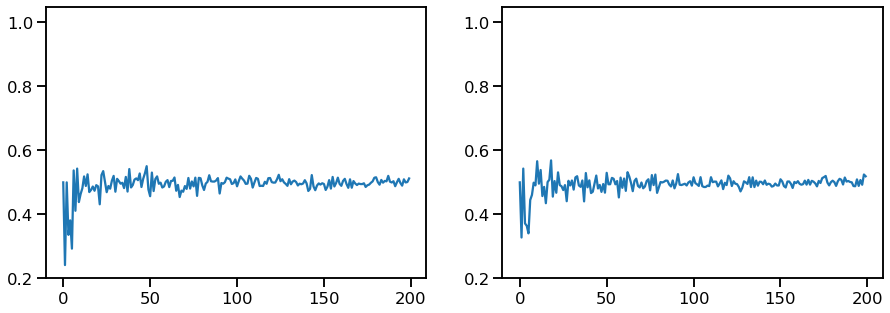

In [5]:
acc = np.array([get_acc(data) for data in dataL]) # sub,layer,trial
f,ax = plt.subplots(1,2,figsize=(15,5),)
for i in range(2):
  M = acc[:,i].mean(0)
  ax[i].plot(M)
  ax[i].set_ylim(0.2,1.05)
plt.savefig('figures/debug/acc_layers-%i'%tstamp)

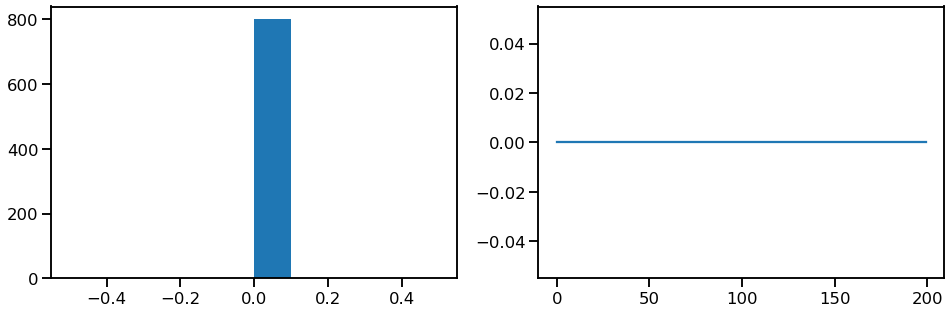

In [6]:
### schema usage
f,ax = plt.subplots(1,2,figsize=(16,5))
zt = data['zt'][:,:-1].flatten()
ax[0].hist(zt)
ax[1].plot(data['zt'][:,:-1].mean(1))

In [7]:
### schema usage
[np.unique(d['zt']) for d in dataL] 

[array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.])]

In [8]:
[d['zt'] for d in dataL] 
for d in dataL:
  for t,(zt,et) in enumerate(zip(d['zt'],d['exp'])):
    print(t,zt,et)
  

0 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
1 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
2 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
3 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
4 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
5 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
6 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
7 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
8 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
9 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
10 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
11 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
12 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
13 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
14 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
15 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
16 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
17 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
18 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
19 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
20 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
21 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
22 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
23 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
24 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
25 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
26 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
27 [ 0.  0.

151 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
152 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
153 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
154 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
155 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
156 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
157 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
158 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
159 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
160 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
161 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
162 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
163 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
164 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
165 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
166 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
167 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
168 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
169 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
170 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
171 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
172 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
173 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
174 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
175 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
176 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
177 [ 0.  0.

115 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
116 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
117 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
118 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
119 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
120 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
121 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
122 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
123 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
124 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
125 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
126 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
127 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
128 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
129 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
130 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
131 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
132 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
133 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
134 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
135 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
136 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
137 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
138 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
139 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
140 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
141 [ 0.  0.

92 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
93 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
94 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
95 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
96 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
97 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
98 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
99 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
100 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
101 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
102 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
103 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
104 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
105 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
106 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
107 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
108 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
109 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
110 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
111 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
112 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
113 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
114 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
115 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
116 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
117 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
118 [ 0.  0.  0.  0.

66 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
67 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
68 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
69 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
70 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
71 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
72 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
73 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
74 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
75 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
76 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
77 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
78 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
79 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
80 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
81 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
82 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
83 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
84 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
85 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
86 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
87 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
88 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
89 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
90 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
91 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
92 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
9

97 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
98 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
99 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
100 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
101 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
102 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
103 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
104 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
105 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
106 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
107 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
108 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
109 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
110 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
111 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
112 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
113 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
114 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
115 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
116 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
117 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
118 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
119 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
120 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
121 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
122 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
123 [ 0.  0.  0

34 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
35 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
36 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
37 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
38 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
39 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
40 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
41 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
42 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
43 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
44 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
45 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
46 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
47 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
48 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
49 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
50 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
51 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
52 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
53 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
54 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
55 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
56 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
57 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
58 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
59 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
60 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
6

20 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
21 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
22 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
23 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
24 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
25 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
26 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
27 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
28 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
29 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
30 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
31 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
32 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
33 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
34 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
35 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
36 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
37 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
38 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
39 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
40 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
41 [ 0.  0.  0.  0. -1.] [0 2 3 6 7]
42 [ 0.  0.  0.  0. -1.] [0 1 4 6 8]
43 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
44 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
45 [ 0.  0.  0.  0. -1.] [0 2 4 5 8]
46 [ 0.  0.  0.  0. -1.] [0 1 3 5 7]
4

In [9]:
for p in data['priors']:
  print(p)

[1.4, 1.4]
[5004, 1.4]
[5008, 1.4]
[5012, 1.4]
[5016, 1.4]
[5020, 1.4]
[5024, 1.4]
[5028, 1.4]
[5032, 1.4]
[5036, 1.4]
[5040, 1.4]
[5044, 1.4]
[5048, 1.4]
[5052, 1.4]
[5056, 1.4]
[5060, 1.4]
[5064, 1.4]
[5068, 1.4]
[5072, 1.4]
[5076, 1.4]
[5080, 1.4]
[5084, 1.4]
[5088, 1.4]
[5092, 1.4]
[5096, 1.4]
[5100, 1.4]
[5104, 1.4]
[5108, 1.4]
[5112, 1.4]
[5116, 1.4]
[5120, 1.4]
[5124, 1.4]
[5128, 1.4]
[5132, 1.4]
[5136, 1.4]
[5140, 1.4]
[5144, 1.4]
[5148, 1.4]
[5152, 1.4]
[5156, 1.4]
[5160, 1.4]
[5164, 1.4]
[5168, 1.4]
[5172, 1.4]
[5176, 1.4]
[5180, 1.4]
[5184, 1.4]
[5188, 1.4]
[5192, 1.4]
[5196, 1.4]
[5200, 1.4]
[5204, 1.4]
[5208, 1.4]
[5212, 1.4]
[5216, 1.4]
[5220, 1.4]
[5224, 1.4]
[5228, 1.4]
[5232, 1.4]
[5236, 1.4]
[5240, 1.4]
[5244, 1.4]
[5248, 1.4]
[5252, 1.4]
[5256, 1.4]
[5260, 1.4]
[5264, 1.4]
[5268, 1.4]
[5272, 1.4]
[5276, 1.4]
[5280, 1.4]
[5284, 1.4]
[5288, 1.4]
[5292, 1.4]
[5296, 1.4]
[5300, 1.4]
[5304, 1.4]
[5308, 1.4]
[5312, 1.4]
[5316, 1.4]
[5320, 1.4]
[5324, 1.4]
[5328, 1.4]
[5332

In [10]:
for like in data['likesL2']:
  print(like)

[0.5, 0.5]
[0.5, 0.5]
[0.9310344827586208, 0.5]
[0.9310344827586208, 0.5]
[0.037037037037037035, 0.5]
[0.037037037037037035, 0.5]
[0.6582278481012658, 0.5]
[0.25961538461538464, 0.5]
[0.5968992248062015, 0.5]
[0.33766233766233766, 0.5]
[0.5698324022346368, 0.5]
[0.37745098039215685, 0.5]
[0.34177215189873417, 0.5]
[0.5, 0.5]
[0.40310077519379844, 0.5]
[0.5, 0.5]
[0.5545851528384279, 0.5]
[0.4015748031496063, 0.5]
[0.4301675977653631, 0.5]
[0.4551971326164875, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.46200607902735563, 0.5]
[0.44541484716157204, 0.5]
[0.5, 0.5]
[0.4551971326164875, 0.5]
[0.5, 0.5]
[0.46200607902735563, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5329815303430079, 0.5]
[0.5329815303430079, 0.5]
[0.4381188118811881, 0.5]
[0.4381188118811881, 0.5]
[0.47086247086247085, 0.5]
[0.5, 0.5]
[0.47390396659707723, 0.5]
[0.47086247086247085, 0.5]
[0.5, 0.5]
[0.47390396659707723, 0.5]
[0.5, 0.5]
[0.4763705103969754, 0.5]
[0.5, 0.5]
[0.4763705103969754, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5215889464594128, 0.5]
[0

In [11]:
for i,po in enumerate(data['postL2']):
  print(i,po)

0 [[0.7, 0.7]]
1 [[2502.0, 0.7]]
2 [[4662.620689655173, 0.7]]
3 [[4666.344827586207, 0.7]]
4 [[185.77777777777777, 0.7]]
5 [[185.92592592592592, 0.7]]
6 [[3306.936708860759, 0.7]]
7 [[1305.346153846154, 0.7]]
8 [[3003.596899224806, 0.7]]
9 [[1700.4675324675325, 0.7]]
10 [[2871.9553072625695, 0.7]]
11 [[1903.862745098039, 0.7]]
12 [[1725.26582278481, 0.7]]
13 [[2526.0, 0.7]]
14 [[2038.077519379845, 0.7]]
15 [[2530.0, 0.7]]
16 [[2808.419213973799, 0.7]]
17 [[2035.1811023622047, 0.7]]
18 [[2181.8100558659216, 0.7]]
19 [[2310.5806451612902, 0.7]]
20 [[2540.0, 0.7]]
21 [[2542.0, 0.7]]
22 [[2350.6869300911853, 0.7]]
23 [[2268.0524017467246, 0.7]]
24 [[2548.0, 0.7]]
25 [[2321.505376344086, 0.7]]
26 [[2552.0, 0.7]]
27 [[2359.9270516717324, 0.7]]
28 [[2556.0, 0.7]]
29 [[2558.0, 0.7]]
30 [[2728.8654353562006, 0.7]]
31 [[2730.997361477572, 0.7]]
32 [[2246.6732673267325, 0.7]]
33 [[2248.4257425742576, 0.7]]
34 [[2418.3496503496503, 0.7]]
35 [[2570.0, 0.7]]
36 [[2437.7620041753653, 0.7]]
37 [[2424.